<a href="https://colab.research.google.com/github/RMLAI/zero-to-mastery-ml/blob/master/Intro_to_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
ls

Advertising.csv                      Hitters.csv
Auto.csv                             Hitters_X_test.csv
Boston.csv                           Hitters_X_train.csv
Caravan.csv                          Hitters_y_test.csv
car-photo.png                        Hitters_y_train.csv
car-sales.csv                        Khan_xtest.csv
car-sales-extended.csv               Khan_xtrain.csv
car-sales-extended-missing-data.csv  Khan_ytest.csv
car-sales-missing-data.csv           Khan_ytrain.csv
Carseats.csv                         NCI60_X.csv
covid_19_india.csv                   NCI60_y.csv
Credit.csv                           panda.png
Default.xlsx                         random_forest_model_1.pkl
dog-photo.png                        Smarket.csv
Heart.csv                            USArrests.csv
heart-disease.csv                    Wage.csv


In [1]:
cd drive/My Drive/Data

/content/drive/My Drive/Data


This notebook Demos the power of scikit learn


*   Getting data ready

*   Choose right algorithm for problem

*   Fit model/algorithm for data , make predictions
*   Evaluate and improve model


*   Load trained model


*   Put it all together



In [0]:
#import necesseary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Getting the data ready
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
# Creating the predictor variable and target variable matrix
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

In [0]:
#checkinng the shape of the predictor and target variables
X.shape,y.shape

((303, 13), (303,))

#2 Choosing the right model and hyperparameters

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#checking the default parameters
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [0]:
#3 Assigining observations to testing and training datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

NameError: ignored

In [0]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [0]:
#fitting the data to the model
clf.fit(X_train,y_train);

In [0]:
#make predictions
y_preds = clf.predict(X_test)

In [0]:
#Actual vs predictions
Check=pd.DataFrame({'Actual':y_test,'Prediction':y_preds})
Check.head(25)

ERROR! Session/line number was not unique in 

,Actual,Prediction
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
245,0,1
175,0,0
168,0,0
223,0,0
217,0,0


database. History logging moved to new session 60


In [0]:
clf.score(X_train,y_train)

1.0

In [0]:
clf.score(X_test,y_test)

0.8688524590163934

In [0]:
# import and test the accuracy metrics ofthe model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [0]:
print(confusion_matrix(y_test,y_preds))

[[22  5]
 [ 3 31]]


In [0]:
print('accuracy:%.2f' %accuracy_score(y_test,y_preds))

accuracy:0.87
ERROR! Session/line number was not unique in database. History logging moved to new session 62


In [0]:
# Improve the model
# Trying different n_estimators
np.random.seed(42)
for i in range(10,100,10):
  print(f'Trying model with {i} estimators')
  clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
  print(f'Model accuracy on test set:{clf.score(X_test,y_test)*100:.2f}%')
  print(' ')

Trying model with 10 estimators
Model accuracy on test set:81.97%
 
Trying model with 20 estimators
Model accuracy on test set:80.33%
 
Trying model with 30 estimators
Model accuracy on test set:81.97%
 
Trying model with 40 estimators
Model accuracy on test set:85.25%
 
Trying model with 50 estimators
Model accuracy on test set:90.16%
 
Trying model with 60 estimators
Model accuracy on test set:83.61%
 
Trying model with 70 estimators
Model accuracy on test set:83.61%
 
Trying model with 80 estimators
Model accuracy on test set:88.52%
 
Trying model with 90 estimators
Model accuracy on test set:86.89%
 


In [0]:
#saving a model
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [0]:
#loading the model
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))
print(f'loaded model acccuracy:{loaded_model.score(X_test,y_test)*100 :.2f}%');

loaded model acccuracy:86.89%


In [0]:
#loading car sales dataset
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [0]:
car_sales.shape

(1000, 5)

In [0]:
from sklearn.model_selection import train_test_split
#splitting data into training and test sets
X = car_sales.drop('Price',axis=1)
y = car_sales['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
#Building a ML Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: ignored

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

In [0]:
transformed_X = transformer.fit_transform(X)
transformed_X[:5]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.47140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.54365e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.81577e+05]])

In [0]:
transformed_X.shape

(1000, 13)

In [0]:
#another way to transform categorical data
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [0]:
#fitting the model again with transformed variables
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2,random_state=0)

In [0]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
model.score(X_test,y_test)

0.34532974807163475

Handling missing values with Pandas

In [0]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [0]:
#which columns are having missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [0]:
#Create X & y
X = car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']
X.shape,y.shape,X.head(),y.head()

((1000, 4), (1000,),      Make Colour  Odometer (KM)  Doors
 0   Honda  White        35431.0    4.0
 1     BMW   Blue       192714.0    5.0
 2   Honda  White        84714.0    4.0
 3  Toyota  White       154365.0    4.0
 4  Nissan   Blue       181577.0    3.0, 0    15323.0
 1    19943.0
 2    28343.0
 3    13434.0
 4    14043.0
 Name: Price, dtype: float64)

In [0]:
#turning the categorical variables to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X


ValueError: ignored

In [0]:
#The error at the top is because the make column contains missing values

In [0]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [0]:
#filling the missing columns
car_sales_missing['Make'].fillna('missing',inplace=True)
car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean,inplace=True)
car_sales_missing['Doors'].fillna(4,inplace=True)

In [0]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [0]:
#dropping the price rows with missing values as we should not filll the target columns with imputed values etc.
car_sales_missing.dropna(inplace=True)

In [0]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [0]:
#making the predictor and target variables
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [0]:
#turning the categorical variables to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

In [0]:
#try to test the model now
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y)

In [0]:
#fitting the random forest regressor
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#scoring the model on training data
model.score(X_train,y_train)

0.8937101720037295

In [0]:
#scoring the model on testing data
model.score(X_test,y_test)

0.3344507234811712

Handling missing values with Scikit Learn

In [0]:
#loading the dataset
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [0]:
car_sales_missing.dropna(subset=['Price'],inplace=True)

In [0]:
car_sales_missing.shape

(950, 5)

In [0]:
#creating the predictor and resonse variable
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']
X.shape,y.shape

((950, 4), (950,))

In [0]:
#filling the missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill the categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

#Define columns
cat_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']

#Create the imputer

imputer = ColumnTransformer([
                             ('cat_imputer',cat_imputer,cat_features),
                             ('door_imputer',door_imputer,door_features),
                             ('num_imputer',num_imputer,num_features)
])

filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [0]:
#converting the array into dataframe
car_sales_filled = pd.DataFrame(filled_X,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()


,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [0]:
#checking for missing values
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [0]:
#turning the categorical variables to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder = 'passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [0]:
#splitting data and making,scorinng the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2,random_state=0)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.15874656822356636

# *3. Choosing the right model and Modeling *

In [0]:
#1.Picking the right model for regression problem
#2.Picking the right model for classification problem

In [0]:
#import the boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#Try ridge regression model
from sklearn.linear_model import Ridge

X=boston_df.drop('target',axis=1)
y=boston_df['target']

#splitting the data
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#instantiate ridge model
model=Ridge()
model.fit(X_train,y_train)

#scoring the model
model.score(X_train,y_train),model.score(X_test,y_test)

NameError: ignored

#Choosing the estimator for classification problem
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [0]:
#loading the heart disease dataset
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
heart_disease.shape

(303, 14)

In [0]:
#importing the model, splitting data into training and test sets
from sklearn.svm import LinearSVC

#Make Predictor and response variables
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
#Instantiate the model and evaluate score
model = LinearSVC()
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.7231404958677686, 0.6721311475409836)

In [0]:
#Try randomforest regressor for boston housing data
#Try ridge regression model
from sklearn.ensemble import RandomForestRegressor

X=boston_df.drop('target',axis=1)
y=boston_df['target']

#splitting the data
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#instantiate ridge model
model=RandomForestRegressor()
model.fit(X_train,y_train)

#scoring the model
model.score(X_train,y_train),model.score(X_test,y_test)

(0.983002849709739, 0.7366913061531987)

In [0]:
#Try RF classifier for heart disease dataset
#loading the heart disease dataset
heart_disease = pd.read_csv('heart-disease.csv')
#importing the model, splitting data into training and test sets
from sklearn.ensemble import RandomForestClassifier

#Make Predictor and response variables
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
#Instantiate the model and evaluate score
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.8688524590163934)

# **Making Prediction with our data**

1.Using predict()
2.Using predict_proba()





In [0]:
model.predict(X_train)

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [0]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [0]:
#compare the results
y_preds=model.predict(X_test)
np.mean(y_preds==y_test)

0.8688524590163934

In [0]:
model.score(X_test,y_test)

0.8688524590163934

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8688524590163934

In [0]:
#This predicts the probabilities of the outcomes of the classification
model.predict_proba(X_test[:5])

array([[0.78, 0.22],
       [0.45, 0.55],
       [0.35, 0.65],
       [1.  , 0.  ],
       [0.89, 0.11]])

**Predicting the outcomes for a regression Model**

In [0]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

In [0]:
#Loadinng the data into the X,y
X = boston_df.drop('target',axis=1)
X.shape

(506, 13)

In [0]:
y = boston_df['target']
y.shape

(506,)

In [0]:
# Splitting the data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [0]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [0]:
#Fitting the model on the training data
model = RandomForestRegressor()
model.fit(X_train,y_train);

In [0]:
# Predicting and stroing outcomes in new array
y_preds = model.predict(X_test)

In [0]:
#Checking the 1st 5 predictions
y_preds[:5]

array([21.399, 28.697, 25.167, 18.331, 19.781])

In [0]:
#Checking the 1st 5 actual values
np.array(y_test[:5])

array([23. , 32. , 24.1, 17.1, 20.8])

**EVALUATING A MACHINE LEARNING MODEL** 
3 Ways to evaluate a ML model

1.Score method
2.Scoring parameter
3.Problem specific metrics functions


In [0]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [0]:
#loading the dataset
heart_disease = pd.read_csv('heart-disease.csv')

In [4]:
#Creating the train test splits
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']
X.shape,y.shape

((303, 13), (303,))

In [0]:
#Splittng the data into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#check the score of the model
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.8524590163934426)

**Evaluating the cross val scores**

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
cross_val_score(model,X,y,cv=10)

array([0.90322581, 0.80645161, 0.90322581, 0.9       , 0.83333333,
       0.86666667, 0.8       , 0.83333333, 0.73333333, 0.8       ])

**Evaluating the model with other scoring parameters**

Classication model Evaluation metrics
1.Accuracy
2.Area Under the Curve
3.Confusion matrix
4.Classification report

**1.Accuracy**

In [0]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [0]:
#loading the dataset
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
X = heart_disease.drop('target',axis=1)
y=heart_disease['target']

In [0]:
#splittin the data into training and testing sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)
cv_score = cross_val_score(model,X,y,cv=5,scoring=None)


In [0]:
cv_score,np.mean(cv_score)

(array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667]),
 0.811639344262295)

In [0]:
print(f'Heart Disease Classifier Cross Validated Accuracy :{np.mean(cv_score)*100:.2f}%')

Heart Disease Classifier Cross Validated Accuracy :81.16%


2.AREA UNDER THE CURVE/ROC Curve
ROC curves are a comparison of the model's true positive rate(tpr) versus the false positive rate(fpr) 

*   True positive = model predicts 1 when truth is 1
*   False positive = model predicts 1 when truth is 0
*   True negative = model predicts 0 when truth is 0
*   False negative = model predicts 0 when truth is 1



In [0]:
#calculating the tpr,fpr
y_probs = model.predict_proba(X_test)
y_probs[:10],len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]), 61)

In [0]:
y_probs_positive = y_probs[:,1]

In [0]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

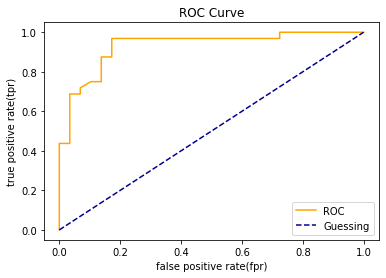

In [0]:
#Create a function to plot the ROC Curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
  '''
  Plots a ROC Curve given the fpr and tpr of a model
  '''
  #plot roc curve
  plt.plot(fpr,tpr,color = 'orange',label='ROC')
  #Plot baseline with no predictive power - guessing
  plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='Guessing')
  
  #customize the plot
  plt.xlabel('false positive rate(fpr)')
  plt.ylabel('true positive rate(tpr)')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [0]:
#Measure the area under the curve in the ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

**Confusion Matrix**

Confusion matrix is a quick way to visualize the labels that the model has predicted correctly versus the ones that the model has predicted incorrectly i.e it shows the true postive , false positive, true negative , false negative in a cross-tab format





In [0]:
# making the predictions with the model above
y_preds=model.predict(X_test)

In [0]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [0]:
#Visualize the matrix with pd cross tab
pd.crosstab(y_test,y_preds,rownames=['Actual labels'],colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


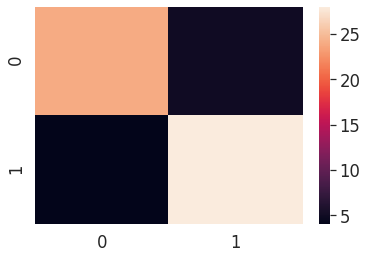

In [0]:
# Making the confusion matrix more visual using seaborn
import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)
#create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)
#plot usingseaborn
sns.heatmap(conf_mat)

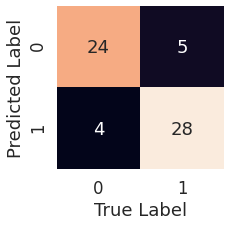

In [0]:
# function to include the confusion matrix numbers in heatmap
def plot_conf_mat(conf_mat):
  '''
  PLots the confusion matrix using the heatmap in seaborn
  '''
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(conf_mat,
                 annot=True, #Annotate boxes with conf_mat info
                 cbar=False)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')

plot_conf_mat(conf_mat)        

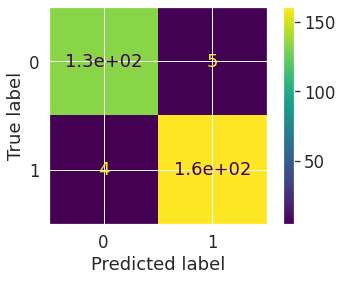

In [0]:
# Plotting confusion matrix from sklearn
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X,y,)

**Classification Report**

In [0]:
#Checking the classification report metric
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

NameError: ignored

In [0]:
# Example to show where precision and accuracy are important - imbalanced cases of classification
disease_true = np.zeros(10000)
disease_true[0]=1 # only 1 positive case
disease_preds = np.zeros(10000) # built model that only predicts zeros
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**METRICS FOR REGRESSION MODELS**

1.R^2 - Pronounced R-squared or coefficient of determination

2.Mean Absolute Error(MAE)

3.Mean Squared Error(MSE)

**R-Squared**
R^2 - compares the model's prediction to the mean of the target. Values range from negatie infinity to 1. If the model is perfect, R^2 value is 1, if model predicts only mean of the targets, then R^2 is 0



In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#Building the model
X = boston_df.drop('target',axis=1)
y=boston_df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.841687018783729

**MEAN ABSOLUTE ERROR**

In [0]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.2744509803921575

In [0]:
#calculating the MAE using formula
df = pd.DataFrame(data={'Actual_values':y_test,
                        'predicted_values':y_preds})
df['difference']=df['Actual_values']-df['predicted_values']
df

,Actual_values,predicted_values,difference
123,17.3,16.607,0.693
153,19.4,15.475,3.925
93,25.0,24.957,0.043
122,20.5,18.595,1.905
164,22.7,20.709,1.991
...,...,...,...
308,22.8,31.166,-8.366
497,18.3,20.465,-2.165
74,24.1,24.930,-0.830
128,18.0,16.606,1.394


In [0]:
df['difference'].mean

<bound method Series.mean of 123    0.693
153    3.925
93     0.043
122    1.905
164    1.991
       ...  
308   -8.366
497   -2.165
74    -0.830
128    1.394
199    1.947
Name: difference, Length: 102, dtype: float64>

**Mean Squared Error**

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_preds)
mse

12.642004901960785

**Using the Scoring Parameter**

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#splitting data into the predictor and response variables
X = heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Modelling
model = RandomForestClassifier()

cv_acc = cross_val_score(model,X,y,scoring=None,cv=5)
cv_acc



array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [0]:
# The mean accuracy of the model
print(f'The accuracy of the model:{np.mean(cv_acc)*100:.2f}%')

The accuracy of the model:82.48%


In [0]:
#Accuracy 

cv_acc = cross_val_score(model,X,y,scoring='accuracy',cv=5)
cv_acc

# The mean accuracy of the model
print(f'The accuracy of the model:{np.mean(cv_acc)*100:.2f}%')


The accuracy of the model:80.18%


In [0]:
# Precision
cv_precision = cross_val_score(model,X,y,scoring='precision',cv=5)
cv_precision

# The mean precision of the model
print(f'The precision of the model:{np.mean(cv_precision)*100:.2f}%')


The precision of the model:83.58%


In [0]:
# Recall
cv_recall= cross_val_score(model,X,y,scoring='recall',cv=5)
cv_recall

# The mean Recall of the model
print(f'The Recall of the model:{np.mean(cv_recall)*100:.2f}%')

The Recall of the model:87.27%


In [0]:
# f1
cv_f1= cross_val_score(model,X,y,scoring='f1',cv=5)
cv_f1

# The mean Recall of the model
print(f'The Recall of the model:{np.mean(cv_f1)*100:.2f}%')

The Recall of the model:82.57%


**Trying various evaluation metrics for Regression models**

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']

model=RandomForestRegressor()

In [0]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,scoring=None)
cv_r2,np.mean(cv_r2)

(array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166]),
 0.622375083951403)

In [0]:
np.random.seed(42)
cv_mae=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
cv_mae,np.mean(cv_mae)

(array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366]),
 -3.0314302853814783)

In [0]:
# MSE
np.random.seed(42)
cv_mse=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
cv_mse,np.mean(cv_mse)

(array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
        -19.77049657]), -21.283214366686064)

**Using Different evaluation metrics as scikit learn functions**

Classifcation Evaluation Functions

In [13]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

#Evaluate the classifier
print('Evaluate the classification model on the test set')
print(f'Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'f1:{f1_score(y_test,y_preds)*100:.2f}%')
print(f'precision:{precision_score(y_test,y_preds)*100:.2f}%')
print(f'recall:{recall_score(y_test,y_preds)*100:.2f}%')

Evaluate the classification model on the test set
Accuracy:85.25%
f1:86.15%
precision:84.85%
recall:87.50%


**Regression Evaluation Functions**

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

#Evaluate the regression model
print('Regression model metrics on test set')
print(f'r2_score:{r2_score(y_test,y_preds):.3f}')
print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_preds):.3f}')
print(f'Mean Squared Error:{mean_squared_error(y_test,y_preds):.3f}')


Regression model metrics on test set
r2_score:0.874
Mean Absolute Error:2.123
Mean Squared Error:9.242


**Improving The Model**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
y_true = y_test

In [0]:
# Tuning the hyperparameters by hand 
# Function to calculte the evaluation metrics
def evaluate_preds(y_true,y_preds):
  '''
  performs the evaluation of y_test vs y_preds on a classification model
  '''
accuracy = accuracy_score(y_true,y_preds)
precision = precision_score(y_true,y_preds)
recall = recall_score(y_true,y_preds)
f1=f1_score(y_true,y_preds)

'''
metric_dict = {'accuracy':round(accuracy,2),
                   'precision':round(precision,2),
                   'recall':round(recall,2),
                    'f1':round(f1,2) }
                    '''
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'precision:{precision:.2f}')
print(f'recall:{recall:.2f}')
print(f'f1:{f1:.2f}')
#return metric_dict

Accuracy:85.25%
precision:0.85
recall:0.88
f1:0.86


In [0]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict


In [0]:
evaluate_preds(y_test,y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'f1': 0.86, 'precision': 0.85, 'recall': 0.88}

In [26]:
#applying the same to hand tune the model using the validatioin and testing set
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1,random_state=0)

#Split into Predictor and response variables
X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

#Splitting the data into training and test splits
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of the dataset
valid_split = round(train_split+0.15*len(heart_disease_shuffled))
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [27]:
#Fitting the model and getting the classification parameters from evaluate function
model = RandomForestClassifier(n_jobs=-1,max_depth=3,n_estimators=50)
model.fit(X_train,y_train)
#Make predictions of baseline model
y_preds = model.predict(X_valid)

#Evaluate the model on validaton set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics


Acc: 84.44%
Precision: 0.86
Recall: 0.89
F1 score: 0.87


{'accuracy': 0.84, 'f1': 0.87, 'precision': 0.86, 'recall': 0.89}

In [28]:
#Evaluating the baseline model on the testset
y_preds_test=model.predict(X_test)

#Evaluate the baseline model on testset
baseline_metrics_test = evaluate_preds(y_test,y_preds_test)
baseline_metrics_test

Acc: 86.96%
Precision: 0.80
Recall: 0.95
F1 score: 0.87


{'accuracy': 0.87, 'f1': 0.87, 'precision': 0.8, 'recall': 0.95}

Hyper Parameter tuning using Randomized searchCV







In [8]:
from sklearn.model_selection import RandomizedSearchCV

#Dictionary of the parameter values for randomized search
grid = {'n_estimators':[10,100,200,500,1000],
        'max_depth':[5,10,15,20,25,30],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6,8,],
        'min_samples_leaf':[1,2,3,4,]}

np.random.seed(42)

#Split the dataset into X&y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease['target']

#Splitting data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the model
model = RandomForestClassifier(n_jobs=-1)

#Set up Randomized search
rs_model = RandomizedSearchCV(estimator = model,
                              param_distributions=grid,
                              n_iter=10,
                              cv=5,
                              verbose=2)
rs_model.fit(X_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=10, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=25 
[CV]  n_estimators=10, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=25, total=   0.1s
[CV] n_estimators=10, min_samples_split=8, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.6s finished


In [9]:
rs_model.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [14]:
#Making predictions with best hyperparameters
rs_y_preds = rs_model.predict(X_test)

#Evaluate predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 59.02%
Precision: 0.58
Recall: 0.78
F1 score: 0.67


In [15]:
grid

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 4, 6, 8],
 'n_estimators': [10, 100, 200, 500, 1000]}

**HyperParameter Tuning with GridSearchCV**

In [0]:
grid_2 = {'n_estimators':[10,100,150],
          'max_depth':[20,30,40],
          'max_features':['auto','sqrt'],
          'min_samples_leaf':[2,5,7],
          'min_samples_split':[2,5,7]}

In [22]:
from sklearn.model_selection import GridSearchCV

#Dictionary of the parameter values for randomized search
'''
grid = {'n_estimators':[10,100,200,500,1000],
        'max_depth':[5,10,15,20,25,30],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6,8,],
        'min_samples_leaf':[1,2,3,4,]}
'''
np.random.seed(42)

#Split the dataset into X&y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease['target']

#Splitting data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the model
model = RandomForestClassifier(n_jobs=-1)

#Set up Randomized search
gs_model = GridSearchCV(estimator = model,
                              param_grid=grid_2,
                              cv=5,
                              verbose=2)
gs_model.fit(X_train,y_train);

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2,

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  4.4min finished


In [23]:
gs_model.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 10}

In [24]:
#Make predictions with gridsearchCV
gs_y_preds = gs_model.predict(X_test)

#Evaluate the metrics of the GridSearch predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 55.74%
Precision: 0.55
Recall: 0.81
F1 score: 0.66


In [25]:
rs_metrics

{'accuracy': 0.59, 'f1': 0.67, 'precision': 0.58, 'recall': 0.78}

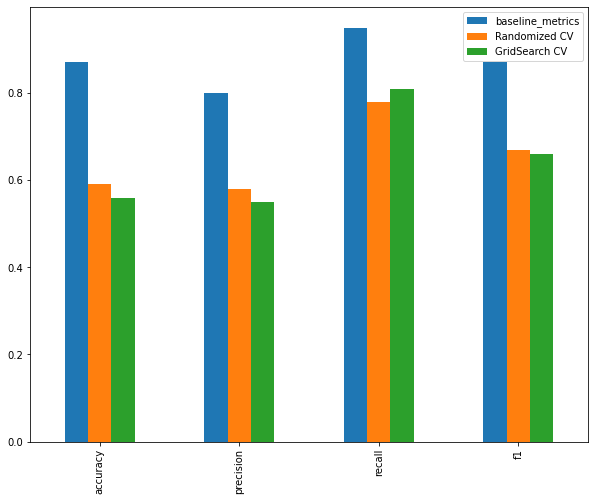

In [31]:
#Lets compare our differnt metrics
compare_metrics = pd.DataFrame({'baseline_metrics':baseline_metrics_test,
                                'Randomized CV':rs_metrics,
                                'GridSearch CV':gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));